# Diver MySQL

Buscar datos en mysql


[Tutorial](https://pynative.com/python-mysql-tutorial/)

Recomiendan usar el __MySQL Connector Python__
* oficial de Oracle
* python 3 
* pure Python

### Instalación

|pip: |`pip install mysql-connector-python`|
|:----|:-----|
|anaconda: |`conda install -c anaconda mysql-connector-python`|
|check: | import mysql.connector|

### Connect

In [2]:
%pylab inline
### Funciones mySQL
import mysql.connector
from mysql.connector import Error
import xml.etree.ElementTree as ET
from xml.dom import minidom

## Variables globales
mySQLconnection = None
myCursor = None

def Init():    
    global mySQLconnection, myCursor
    myHost = 'localhost'
    myDB   = 'gsr0'
    myUser = 'willy'
    myPass = 'zapandanga'
    
    try:
        mySQLconnection = mysql.connector.connect(host    =myHost,
                                                  database=myDB,
                                                  user    =myUser,
                                                  password=myPass)
        myCursor = mySQLconnection.cursor()
        print("Database {} connected".format(myDB))
        
    except  Error as e:
        print ("Error while connecting to MySQL", e)
        
    return None

def query(q):
    myCursor.execute(q)
    return myCursor.fetchall()

def Close():
    if(mySQLconnection.is_connected()):
        myCursor.close()
        mySQLconnection.close()
        print("MySQL connection is closed")
    else:
        print("MySQL connection already closed")

def columns(table):
    cols = query("SHOW COLUMNS FROM {}".format(table))
    return list(map(lambda x:x[0],cols))

def xmlStr(xml):
    rootstr = minidom.parseString(xml).toprettyxml(indent="  ")
    rootstr = rootstr[rootstr.find('\n')+1:]
    return rootstr

def circle(x,y):
    A = det(matrix([[x[0],y[0],1],
                    [x[1],y[1],1],
                    [x[2],y[2],1]]))
    B =-det(matrix([[x[0]**2+y[0]**2,y[0],1],
                    [x[1]**2+y[1]**2,y[1],1],
                    [x[2]**2+y[2]**2,y[2],1]]))
    C = det(matrix([[x[0]**2+y[0]**2,x[0],1],
                    [x[1]**2+y[1]**2,x[1],1],
                    [x[2]**2+y[2]**2,x[2],1]]))
    D =-det(matrix([[x[0]**2+y[0]**2,x[0],y[0]],
                    [x[1]**2+y[1]**2,x[1],y[1]],
                    [x[2]**2+y[2]**2,x[2],y[2]]]))
    return [-B/2/A,-C/2/A],sqrt((B**2+C**2-4*A*D)/(4*A**2))
    
def circlePlot(x,y):
    cc,r = circle(x,y)
    tita = linspace(0,2*pi,200)
    return cc[0]+r*cos(tita),cc[1]+r*sin(tita)

def circle(cc,r):
    tita = linspace(0,2*pi,200)
    return cc[0]+r*cos(tita),cc[1]+r*sin(tita)

def dist(x1,x2,y1,y2):
    return sqrt((x2-x1)**2+(y2-y1)**2)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Print de una tabla
Init()    

table = "Files"
cols    = columns(table)
records = query("select * from {} where FileID=500".format(table))

## Imprimo la tabla
print ("Table: {}\n".format(table))

for col in cols:
    print(col,end='\t')
print('\n'+'-'*80)
for row in records:
    for col in row:
        print(col,end='\t')
    print()
    
print()    
Close()

Database gsr0 connected
Table: Files

FileID	Path	Extra	Date	
--------------------------------------------------------------------------------
500	./data/20181023Ed_data/2018-4961-MI0.mdb	Ed	2018-10-23	

MySQL connection is closed


--------------

## Cosas que voy aprendiendo:

* Cada Área tiene un nombre.
* Shape = 3 es un círculo y Shape = 1 es un punto.
  * Si es un círculo, hay 6 Stage_Position __<<__
    * Las primeras tres son bordes del círculo
    * La siguiente es el centro
    * Las otras dos no sé (tienen otro Z)
  * Si es un punto, hay sólo 1 Stage_Position __<<__

In [168]:
#### Print 'Areas' Table
Init()   
print(columns('Areas'))
fID = 400
i   =   1
IDs = query('select AreaID from Areas where FileID={}'.format(fID))
print(IDs)

ID = IDs[i][0]
Name          = query('select Name          from Areas where (FileID={} AND AreaID={})'.format(fID,ID))[0][0]
Definition    = query('select Definition    from Areas where (FileID={} AND AreaID={})'.format(fID,ID))[0][0]
DataCollected = query('select DataCollected from Areas where (FileID={} AND AreaID={})'.format(fID,ID))[0][0]
print()
print('Name :',Name)
print('Def  :',xmlStr(Definition))
print('DataC:',DataCollected)

print()    
Close()

Database gsr0 connected
['AreaID', 'FileID', 'Name', 'Definition', 'DataCollected']
[(25,), (26,), (27,), (28,), (29,), (30,), (31,), (32,), (33,), (34,), (35,), (36,), (37,), (38,), (39,), (40,), (41,), (42,), (43,), (44,), (45,), (46,), (47,), (48,), (49,), (50,)]

Name : Stub 6
Def  : <AreaOfInterest EdgeBoundary="0" OriginalFeatureID="0" ParentAreaID="0" Shape="3" Type="0">
  <StagePositions>
    <Stage_Position R="0.00" T="0.00" X="52.574" Y="58.030" Z="40.404"/>
    <Stage_Position R="0.00" T="0.00" X="41.176" Y="56.755" Z="40.568"/>
    <Stage_Position R="0.00" T="0.00" X="46.208" Y="66.621" Z="40.393"/>
    <Stage_Position R="0.00" T="0.00" X="46.558" Y="60.226" Z="40.459"/>
    <Stage_Position R="0.00" T="0.00" X="0.013" Y="0.011" Z="1.000"/>
    <Stage_Position R="0.00" T="0.00" X="6.405" Y="0.000" Z="0.000"/>
  </StagePositions>
  <Column_Conditions Column_Code="0" High_Voltage="0" Magnification="369" Probe_Current="0" Working_Distance="8.62694"/>
</AreaOfInterest>

DataC: 1

In [187]:
### Descomposición XML
root = ET.fromstring(Definition)
root.tag, root.attrib

('AreaOfInterest',
 {'Shape': '3',
  'Type': '0',
  'ParentAreaID': '0',
  'OriginalFeatureID': '0',
  'EdgeBoundary': '0'})

Populating the interactive namespace from numpy and matplotlib
{'X': '60.382', 'Y': '71.778', 'Z': '40.236', 'T': '0.00', 'R': '0.00'}
{'X': '48.171', 'Y': '72.240', 'Z': '40.243', 'T': '0.00', 'R': '0.00'}
{'X': '54.101', 'Y': '80.185', 'Z': '40.135', 'T': '0.00', 'R': '0.00'}
{'X': '54.345', 'Y': '73.818', 'Z': '40.216', 'T': '0.00', 'R': '0.00'}
{'X': '0.001', 'Y': '0.013', 'Z': '1.000', 'T': '0.00', 'R': '0.00'}
{'X': '6.372', 'Y': '0.000', 'Z': '0.000', 'T': '0.00', 'R': '0.00'}


(47.33628081404017, 61.35435551159294, 66.80816532951563, 80.82667674723835)

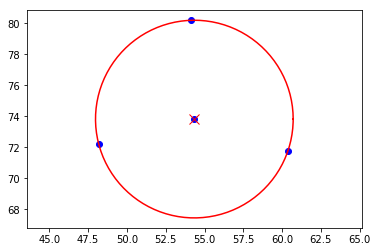

In [135]:
### Chequeo de centro
xx,yy=[],[]
for l in root[0]:
    print(l.attrib)
    xx.append(float(l.attrib['X']))
    yy.append(float(l.attrib['Y']))
x4,y4 = xx[3],yy[3]
xx,yy = xx[:3],yy[:3]
cc,r = circle(xx,yy)

x0,y0 = mean(xx),mean(yy)
plot(xx,yy,'bo')
plot(x4,y4,'bo')
plot(*cc,'rx',markersize=10)
plot(*circlePlot(xx,yy),'r-')
axis('equal')

In [209]:
# Cuántos shapes hay ??
# Sólo hay 2 shapes: 0 (1 stage position) 3 (6 stage position)
# Chequeado sobre toda la base de datos

Init()   
fID = 400
alldata=[]
for fID in arange(870)+1:
    IDs = query('select AreaID from Areas where FileID={}'.format(fID))
    for ID in IDs:
        ID = ID[0]
        #Definition = query('select Definition from Areas where (FileID={} AND AreaID={})'.format(fID,ID))[0][0]
        Definition = query('select Definition from Areas where (AreaID={})'.format(ID))[0][0]
        root = ET.fromstring(Definition)
        shapie = [root.attrib['Shape'],len(root[0])]
        if shapie==['3',6]:
            alldata.append(3)
        elif shapie==['0',1]:
            alldata.append(0)
        else:
            print (shapie)
            alldata.append(42)
        #print(ID,root.attrib['Shape'],len(root[0]))
print (len(alldata),set(alldata))
Close()

Database gsr0 connected
20038 {0, 3}
MySQL connection is closed


In [270]:
### Print 'AreaVariables' table
Init()   
print(columns('AreaVariables'))
fID = 406
i   =   1
#IDs = query('select AreaID from Areas where FileID={}'.format(fID))
#print(IDs)

data = query('select *         from AreaVariables where (FileID={} AND AreaID =38)'.format(fID)) 
#data = query('select Name        from GlobalVariables where (FileID={} )'.format(fID)) 

for l in data:
    print(l )
Close()

Database gsr0 connected
['AreaID', 'FileID', 'Name', 'Definition']
(38, 406, 'FieldLayout', '0')
(38, 406, 'UseNumFields', '0')
(38, 406, 'AreaFraction', '0.1')
(38, 406, 'Overlap', '0')
(38, 406, 'Selected', '-1')
(38, 406, 'FieldsOnArea', '-1')
(38, 406, 'BeamVectX', '0.99996')
(38, 406, 'BeamVectY', '0.00862')
(38, 406, 'NumFields', '220')
(38, 406, 'FieldWidth', '0.81909')
(38, 406, 'FieldHeight', '0.61432')
(38, 406, 'FieldWidthPx', '2048')
(38, 406, 'FieldHeightPx', '1536')
MySQL connection is closed


Database gsr0 connected
MySQL connection is closed


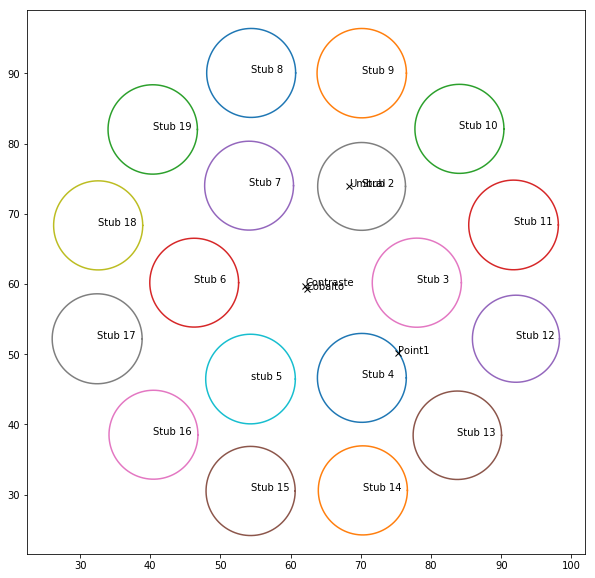

In [383]:
figure(figsize=(10,10))
Init()   
fID = 144
alldata=[]

def dist(x1,x2,y1,y2):
    return sqrt((x2-x1)**2+(y2-y1)**2)

IDs = query('select AreaID from Areas where FileID={}'.format(fID))
for ID in IDs:
    ID = ID[0]
    Name       = query('select Name       from Areas where (FileID={} AND AreaID={})'.format(fID,ID))[0][0]
    Definition = query('select Definition from Areas where (FileID={} AND AreaID={})'.format(fID,ID))[0][0]
    D = ET.fromstring(Definition)
    
    ## Posiciones
    R = []
    for p in D[0]:
        R.append([float(p.attrib['X']),float(p.attrib['Y']),float(p.attrib['Z'])])
    
    ### Dibujos
    if D.attrib['Shape']=='3':
        x,y,z = zip(*R[:4])
        r = dist(x[0],x[3],y[0],y[3])
        c = [x[3],y[3]]
        text(*c,Name)
        #plot(x,y,'bo')
        plot(*circle(c,r))
    else:
        #Shape=0
        x,y,z = zip(*R)
        plot(x,y,'kx')
        text(x[0],y[0],Name)
    
    
Close()
axis('equal');

In [ ]:
Type="0" ParentAreaID="0" OriginalFeatureID="0" EdgeBoundary="0"

In [283]:
Init()   
fID = 406
alldata=[]

IDs = query('select AreaID from Areas where FileID={}'.format(fID))
print('Shape','Type','Parent','Feature','|','DataCollected')
for ID in IDs:
    ID = ID[0]
    Name       = query('select Name       from Areas where (FileID={} AND AreaID={})'.format(fID,ID))[0][0]
    Definition = query('select Definition from Areas where (FileID={} AND AreaID={})'.format(fID,ID))[0][0]
    DataCollected = query('select DataCollected from Areas where (FileID={} AND AreaID={})'.format(fID,ID))[0][0]
    data = query('select *         from AreaVariables where (FileID={} AND AreaID ={})'.format(fID,ID))
    
    D = ET.fromstring(Definition)
    
    ## 
    i=11
    try:
        print(D.attrib['Shape'],D.attrib['Type'],D.attrib['ParentAreaID'],D.attrib['OriginalFeatureID'],'|',data[i][2:],'|',DataCollected,ID,Name)
    except:
        pass

Close()

Database gsr0 connected
Shape Type Parent Feature | DataCollected
3 0 0 0 | ('FieldWidthPx', '2048') | 1 38 Stub 8
0 0 38 340 | ('FieldWidthPx', '2048') | 1 47 Stub 8(F340)
0 0 38 655 | ('FieldWidthPx', '2048') | 1 48 Stub 8(F655)
0 0 38 1450 | ('FieldWidthPx', '2048') | 1 49 Stub 8(F1450)
0 0 38 2183 | ('FieldWidthPx', '2048') | 1 50 Stub 8(F2183)
MySQL connection is closed


## Tesis
* Datacollected es =1 sobre la muestra de estudio
* ParentAreaID  y OriginalFeatureID son lo que parecen
* Type=1 en testigos puntuales ???? (T+ no figura)
* 
* AreaVariables
  * FieldLayout, UseNumFields, Overlap, EdgeBoundary = 0
  * NumFields = Número de campos adquiridos 220/Stub8 1/chequeos
  * AreaFraction = 0.1
  * FieldsOnArea = -1
  * Selected = 0 todos -- -1 mediciones
  * BeamVectX,Y = todos
  * FieldWidth/Height  sólo existe en los medidos y varía en cada uno
  * FieldWidthPx/HeightPx  sólo existe en los medidos = 2048/1536
  

In [379]:
### Chequeos

Init()   
alldata=[]
#for fID in arange(870)+1:
for fID in [144,145,146,147]:
    IDsNames   = query('select AreaID,Name from Areas where FileID={}'.format(fID))
    datasample=[]
    for ID,Name in IDsNames:
        Definition,DC = query('select Definition,DataCollected from Areas where (FileID={} AND AreaID={})'.format(fID,ID))[0]
        root = ET.fromstring(Definition)
        NAME=''
        print(DC,root.attrib)
        if int(DC)==1:
            #print(fID,ID,Name,root.attrib)
            parent = int(root.attrib['ParentAreaID'])
            if parent==0:
                if datasample==[]:
                    NAME = Name[:]
                    datasample.append(ID)
                else:
                    print('Two Parent==0, Exception in fID =',fID)
            elif parent in datasample:
                datasample.append(ID)
            else:
                print('Exception in fID =',fID)
                print(fID,ID,Name,root.attrib)
    print(fID,NAME,datasample)   

Close()

Database gsr0 connected
0 {'Shape': '3', 'Type': '0', 'ParentAreaID': '0', 'OriginalFeatureID': '0', 'EdgeBoundary': '0'}
0 {'Shape': '0', 'Type': '1', 'ParentAreaID': '0', 'OriginalFeatureID': '0', 'EdgeBoundary': '0'}
0 {'Shape': '3', 'Type': '0', 'ParentAreaID': '0', 'OriginalFeatureID': '0', 'EdgeBoundary': '0'}
0 {'Shape': '3', 'Type': '0', 'ParentAreaID': '0', 'OriginalFeatureID': '0', 'EdgeBoundary': '0'}
0 {'Shape': '0', 'Type': '0', 'ParentAreaID': '0', 'OriginalFeatureID': '0', 'EdgeBoundary': '0'}
0 {'Shape': '3', 'Type': '0', 'ParentAreaID': '0', 'OriginalFeatureID': '0', 'EdgeBoundary': '0'}
0 {'Shape': '3', 'Type': '0', 'ParentAreaID': '0', 'OriginalFeatureID': '0', 'EdgeBoundary': '0'}
0 {'Shape': '3', 'Type': '0', 'ParentAreaID': '0', 'OriginalFeatureID': '0', 'EdgeBoundary': '0'}
0 {'Shape': '3', 'Type': '0', 'ParentAreaID': '0', 'OriginalFeatureID': '0', 'EdgeBoundary': '0'}
0 {'Shape': '3', 'Type': '0', 'ParentAreaID': '0', 'OriginalFeatureID': '0', 'EdgeBoundary': '

In [3]:
### Visualizo

### Chequeos hay una medición en cada mdb?

Init()   
fID = 400
alldata=[]
#for fID in arange(870)+1:
for fID in  [400,144,145,146,147,148,149,150,151]:
    fname = query('select Path from Files where FileID={}'.format(fID))
    IDsNamesDCsDs   = query('select AreaID,Name,DataCollected,Definition from Areas where FileID={}'.format(fID))
    for ID,Name,DC,Definition in IDsNamesDCsDs:
        NNDD = query('select Name,Definition from AreaVariables where (FileID={} AND AreaID={})'.format(fID,ID))
        NN,DD = zip(*NNDD)
        FieldData = query('select FieldID,X,Y,DataCollected from Fields where(FileID={} AND AreaID={})'.format(fID,ID))
        if len(FieldData)!=0:
            fieldID,X,Y,DC2 = zip(*FieldData)
        else:
            fieldID,X,Y,DC2 = '','','',''
        D = ET.fromstring(Definition)
        Typ = D.attrib['Type']
        parent = D.attrib['ParentAreaID']
        nf = DD[NN.index('NumFields')]
        sel = DD[NN.index('Selected')]
        if nf!='0' or DC!='0' or sel=='-1' or Typ=='1':
            print(fID,ID,DC,Name,nf,sel,Typ,len(FieldData),DC2,len(DC2),X,len(X))
    print()

Close()

Database gsr0 connected
400 26 1 Stub 6 220 -1 0 220 ('1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '

In [27]:
### Visualizo

### Chequeos hay una medición en cada mdb?

Init()   
fID = 400
alldata=[]
i=0
for fID in arange(870)+1:
#for fID in arange(10)+1:
#for fID in  [400,144,145,146,147,148,149,150,151]:
    fname = query('select Path from Files where FileID={}'.format(fID))
    fields = query('select FieldID from Fields where(FileID={})'.format(fID))
    if len(fields)==0:
        i+=1
        print (fID, '-'*(6-len(str(fID)))+' Nada.')
        print ()
        continue
    
    aID   = query('select AreaID from Areas where FileID={}'.format(fID))
    for ID in aID:
        ID = ID[0]
        fiIDs = query('select FieldID from Fields where(FileID={} AND AreaID={})'.format(fID,ID))
        NNDD  = query('select Name,Definition from AreaVariables where (FileID={} AND AreaID={})'.format(fID,ID))
        NN,DD = zip(*NNDD)
        sel = DD[NN.index('Selected')]
        Name = query('select Name from Areas where FileID={} and AreaID={}'.format(fID,ID))
        if len(fiIDs)!=0:   
            print (fID,sel,ID, Name[0][0])
        elif sel=='-1' or sel==-1:
            print(fID,sel,Name[0][0])
        
    print()

Close()
print('-----',i)

Database gsr0 connected
1 -1 57 Stub 4
1 -1 66 Stub 4(F6133)
1 -1 67 Stub 4(F15361)
1 -1 68 Stub 4(F7624)
1 -1 69 Stub 4(F12328)
1 -1 70 Stub 4(F15357)
1 -1 71 Stub 4(F2904)
1 -1 72 Stub 4(F2904)(F15963)
1 -1 73 Stub 4(F1288)

2 -1 38 stub 5
2 -1 40 stub 5(F2156)
2 -1 41 stub 5(F2095)
2 -1 42 stub 5(F2671)

3 ----- Nada.

4 ----- Nada.

5 -1 20 Stub 7

6 -1 57 Stub 4
6 -1 66 Stub 4(F20895)

7 -1 25 stub 5

8 ----- Nada.

9 ----- Nada.

10 -1 18 Stub 6

11 -1 19 Stub 7

12 -1 29 Stub 8
12 -1 30 Stub 8(F227)
12 -1 31 Stub 8(F243)
12 -1 32 Stub 8(F228)

13 -1 31 Stub 9

14 -1 32 Stub 9

15 -1 48 Stub 9
15 -1 49 Stub 9(F872)
15 -1 50 Stub 9(F1015)
15 -1 51 Stub 9(F21)
15 -1 52 Stub 9(F168)
15 -1 53 Stub 9(F872)(F1112)
15 -1 54 Stub 9(F875)

16 -1 32 Stub 9

17 -1 31 Stub 4

18 -1 24 stub 5

19 -1 158 Stub 4
19 -1 175 Stub 4(F49)
19 -1 176 Stub 4(F622)

20 -1 23 Stub 6
20 -1 39 Stub 6(F14)
20 -1 40 Stub 6(F215)

21 -1 33 Stub 8
21 -1 39 Stub 8(F569)
21 -1 40 Stub 8(F43)
21 -1 41 Stub 8(F203

KeyboardInterrupt: 

In [ ]:
SELECT FileID, count(FieldID) FROM Fields GROUP BY FileID ORDER BY FileID ASC;
Esto sólo me da los que tienen un stub válido
1,2,5,6,7  valores muy altos de fields
14,51   se va al acarajo
862,863 muy bajos
14 es demasiado alto, seguramente un error, 
pero escanearon media muestra


Chequear parentID y eso

# Check de Masurements


In [40]:
Init()
fs = query('SELECT FileID, AreaID FROM Files WHERE Valid=1')
print(fs)

Database gsr0 connected
[(1, 57), (2, 38), (5, 20), (6, 57), (7, 25), (10, 18), (11, 19), (12, 29), (13, 31), (14, 32), (15, 48), (16, 32), (17, 31), (18, 24), (19, 158), (20, 23), (21, 33), (22, 32), (23, 34), (24, 29), (25, 24), (26, 31), (27, 33), (28, 35), (29, 20), (30, 21), (31, 29), (32, 30), (33, 170), (34, 26), (35, 37), (36, 26), (39, 75), (40, 45), (41, 39), (42, 40), (45, 48), (46, 49), (47, 31), (48, 51), (49, 33), (50, 34), (51, 39), (53, 24), (54, 25), (55, 92), (56, 45), (57, 78), (58, 177), (59, 56), (60, 26), (61, 27), (62, 37), (63, 48), (64, 31), (65, 40), (66, 42), (67, 23), (68, 29), (69, 37), (70, 32), (71, 41), (72, 22), (73, 24), (74, 33), (75, 108), (76, 34), (77, 24), (78, 28), (79, 23), (80, 90), (83, 28), (84, 31), (87, 44), (89, 40), (90, 29), (92, 27), (93, 60), (94, 54), (95, 33), (96, 28), (97, 29), (98, 52), (100, 176), (102, 49), (106, 93), (107, 60), (108, 55), (109, 63), (110, 197), (111, 154), (112, 146), (113, 25), (114, 24), (121, 63), (122, 42),

In [41]:
fs = [(400, 26)]

## Loop de Files
for fID, AreaID in fs:
    print(fID,AreaID)
    ## loop de Fields
    FieldIDs_Q = f"(SELECT FieldID FROM Fields WHERE (FileID={fID} AND AreaID={AreaID}))"
    print('\t',len(query(FieldIDs_Q)),'Fields')
    ## Loop de Features
    FeaturesIds_Q = f"(SELECT FeatureID FROM Features WHERE (FileID={fID} AND FieldID IN {FieldIDs_Q}))"
    FeaturesIds = query(FeaturesIds_Q)
    FeaturesIds = list(map(lambda x:x[0], FeaturesIds))
    print(FeaturesIds,len(FeaturesIds), 'Features')
    ## loop de Results
    common=None
    for FeatureID in FeaturesIds:
        ResultsIDs_Q = f"(SELECT MeasurementID FROM Results WHERE (FileID={fID} AND FeatureID={FeatureID}))"
        ResultsIDs = query(ResultsIDs_Q)
        ResultsIDs = list(map(lambda x:x[0], ResultsIDs))
        if common is None:
            common = sorted(ResultsIDs)
        else:
            for item in common:
                if item not in ResultsIDs:
                    common.remove(item)
        print('  ',FeatureID, len(common),common)
    
Close()

400 26
	 220 Fields
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 21

In [43]:
Init()
for item in common:
    Def = query(f"SELECT Definition FROM Measurements WHERE (FileID={fID} AND MeasurementID={item})")
    print(Def)
Close()

Database gsr0 connected
[('Area',)]
[('AspectRatio',)]
[('CentreX',)]
[('CentreY',)]
[('Breadth',)]
[('Direction',)]
[('ECD',)]
[('Length',)]
[('Perimeter',)]
[('Shape',)]
[('MeanGrey',)]
[('SpectrumArea',)]
[('X',)]
[('Y',)]
[('Z',)]
[('CameoX',)]
[('CameoY',)]
MySQL connection is closed
